# 04. 그래프 그리기

파이썬에는 다양한 시각화 라이브러리들이 있다. 
<img src="https://miro.medium.com/max/1400/1*K8q5e6QuHTGSPtObumouVQ.png" width="50%">
[참고] https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/

## 04-1. 데이터 시각화가 필요한 이유

__앤스콤 4분할 그래프 살펴보기__

이 그래프는 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프이다. __앤스콤 4분할 그래프를 구성하는 4개의 데이터 그룹은 각각 평균, 분산, 상관관계, 회귀선이 같다__ 는 특징이 있다. 수치 결과만 보고 '4개의 데이터 그룹이 모두 같을 것이다.'라고 착각할 수 있으나 각 __데이터 그룹을 시각화하면 서로 다른 데이터 패턴을 가지고 있다는 것을 알 수 있다.__


## 앤스콤 데이터 집합 불러온 후 그래프 그리기

### 1. 앤스콤 데이터 집합 불러오기

앤스콤 데이터는 seaborn이라는 라이브러리에 내장되어 있다. 우선 seaborn 라이브러리를 호출하고 load_dataset 메소드를 이용해서 데이터셋을 불러옵니다.

In [1]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

- 데이터셋이 데이터 프레임 형태로 저장된것을 볼 수 있다.
- dataset열이 데이터 그룹을 구분한다. 4개의 데이터 그룹(I,II,III,IV)이 있고 x, y열을 가지고 있다.

### matplotlib 라이브러리로 그래프 그리기

In [2]:
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 입니다.
%matplotlib inline #앞의 %이건 매직함수라고 해서 다른 것을 끌어와서 그대로 쓸 수 있음

import matplotlib.pyplot as plt 

In [3]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

### 4. 선 그래프 - plot 메서드
- plt.plot(x,y)
- 마커를 변경하고 싶으면 세 번째 인자로 전달 -> plt.plot(x,y,'o')

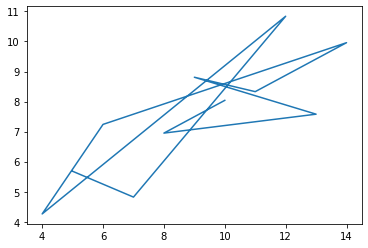

In [4]:
plt.plot(dataset_1['x'], dataset_1['y']) # 해석하기 힘든 그래프가 나옴

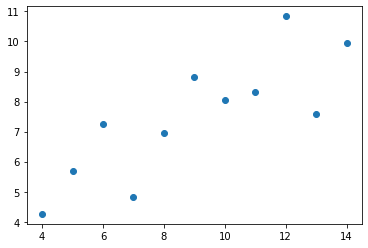

In [5]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o') 
# 끝부분에 동그라미 넣음으로써 동그라미로 표현되게 함 * 이거 넣으면 이모양으로 된다.

__앤스콤 데이터 집합 모두 사용해 그래프 만들기__

### matplotlib 라이브러리로 그래프 그리기
1. 전체 그래프가 위치할 기본 틀 만들기 => plt.figure()
2. 그래프를 그려 넣을 그래프 격자 만들기 => add_subplot()
 - 첫 번째 인자 : 행 크기, 두 번째 인자 : 열 크기
3. 격자에 그래프 추가. 왼쪽에서 오른쪽 방향으로 추가된다. => plot()
4. 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣는다.

In [5]:
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']  

#### 1. 기본 틀 만들기(figure)
matplotlib에서 그래프는 Figure 객체 내에 존재한다. 그래프를 위한 새로운 figure(피겨)는 plt.figure를 사용해 생성할 수 있다.

#### 2. 격자 만들기(서브플롯)
빈 figure로는 그래프를 그릴 수 없다.add_subplot을 사용해서 최소 하나 이상의 subplots를 생성해야한다.

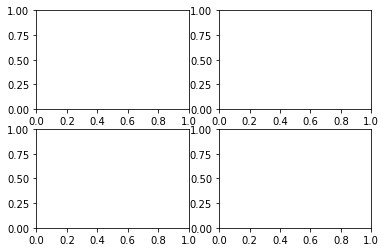

In [6]:
fig = plt.figure() # 기본틀 만들기 
axes1 = fig.add_subplot(2, 2, 1) #figure가 2*2 이고, 4개의 서브플롯 중 첫 번째를 선택하겠다는 의미
#나머지 데이터에 대해서도 작성해보기
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 =fig.add_subplot(2,2,4)

__3. 격자에 그래프 추가__

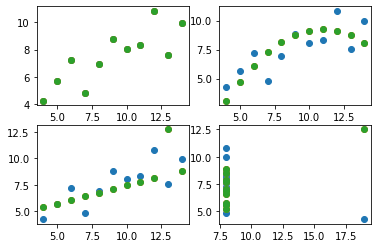

In [9]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
#나머지 데이터에 대해서도 작성해보기
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o') 
# 해당데이터를 x축과 y축에 넣고 동그라미로 그리겠다
fig

그래프를 확인하려면 fig를 반드시 입력해야한다.

__5. 그래프 격자에 제목 추가 => set_title("title")__

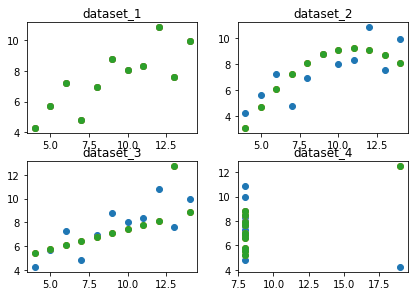

In [12]:
axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

__6. 기본 틀(fig)에 제목 추가 => fig.suptitle("title")__

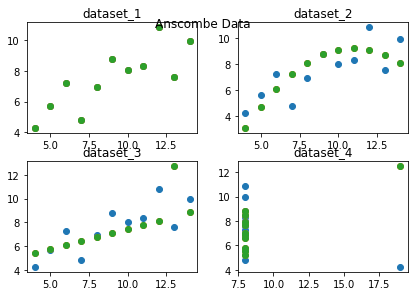

In [13]:
fig.suptitle("Anscombe Data")

fig

__7. 그래프의 이름과 숫자가 겹칠 때 : 그래프의 레이아웃 조절 => fig.tight_layout()__

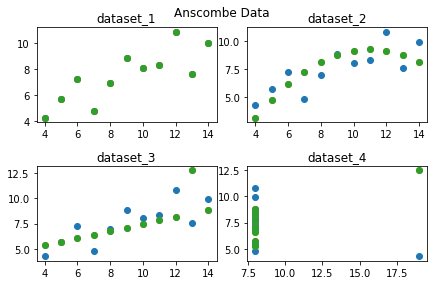

In [14]:
#그래프의 이름과 숫자가 겹칠때
#아래에 작성해보기 
fig.tight_layout()
fig

## 04-2. matplotlib 라이브러리 자유자재로 사용하기

## 기초 그래프 그리기 ― 히스토그램, 산점도, 박스 그래프

__seaborn 라이브러리의 tips 데이터__ : 식당에서 팁을 지불한 손님의 정보를 모아둔 데이터 집합

In [15]:
import seaborn as sns
tips = sns.load_dataset("tips") 
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


### 히스토그램 그리기
데이터 프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용한다. 이처럼 변수를 하나만 사용해서 그린 그래프를 '일변량 그래프' 라고 한다.

__1. 기본 틀(fig)와 격자(axes1) 만들기__

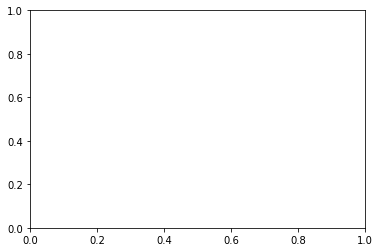

In [16]:
fig = plt.figure() 
axes1 = fig.add_subplot(1, 1, 1) 

__2. 히스토그램 그리기 => hist(변수)__
- bins 인잣값으로 x축의 간격 조정 => bins=10 : x축 간격을 10으로 조정한다.

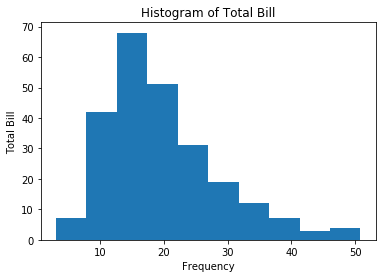

In [18]:
# total_bill 변수에 대한 히스토그램 그리기 
# 빈칸($ 표시)을 채워주세요 
axes1.hist(tips['total_bill'], bins=10) #.hist하고 사용할 데이터 넣기

axes1.set_title('Histogram of Total Bill') #그래프의 제목 추가
axes1.set_xlabel('Frequency')  #x축 제목 추가
axes1.set_ylabel('Total Bill') #y축 제목 추가

fig

히스토그램을 그려본 결과, total_bill 변수는 왼쪽으로 기울어진 분포임을 알 수 있다. 

### 산점도 그리기
산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며, 변수 2개를 사용하기 때문에 '이변량 그래프'라고 부른다.

__scatter(x,y) : x축과 y축을 설정해 산점도를 그린다.__

Text(0, 0.5, 'Tip')

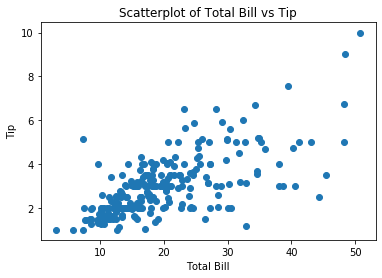

In [19]:
scatter_plot = plt.figure() #기본 틀 만들기
#아래에 직접 써보세요
axes1=scatter_plot.add_subplot(1,1,1) #격자 만들기
axes1.scatter(tips['total_bill'],tips['tip']) #플랏 그리기
axes1.set_title('Scatterplot of Total Bill vs Tip') #그래프 제목 추가
axes1.set_xlabel('Total Bill') #x축 제목 추가
axes1.set_ylabel('Tip') #y축 제목 추가

### 박스 플랏 그리기
박스 플랏은 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다.

__boxplot(리스트 1, 리스트 2, ..., labels=[범주의 이름])__

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

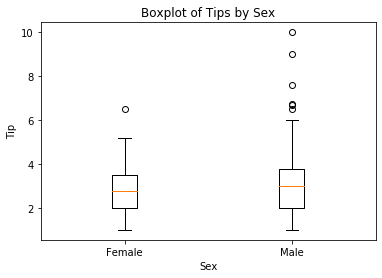

In [22]:
boxplot = plt.figure() #기본 틀 만들기
axes1 = boxplot.add_subplot(1, 1, 1) #격자 만들기

axes1.boxplot( 
    [tips[tips['sex'] == 'Female']['tip'], #sex 열이 female인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달
     tips[tips['sex'] == 'Male']['tip']], #sex 열이 male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달
    labels=['Female', 'Male']) #labels 인잣값 : 두 개의 박스 플랏에 이름 추가


axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by Sex')

__다변량 그래프 그리기__


## 다변량 데이터로 다변량 그래프 그리기 ─ 산점도 그래프

### 산점도에 색상/크기 추가하여 다변량 그래프(4개 변수)  그리기
Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없으므로 각 문자열을 정수로 치환하는 함수를 만든다.

In [20]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

In [21]:
tips['sex_color'] = tips['sex'].apply(recode_sex) #female=0, male=1로 변환한 값을 새로운 열에 추가

__* scatter의 인잣값__
- s : 점의 크기(size)
- c : 점의 색상(color)
- alpha : 투명도(0~1 사이의 값)

Text(0, 0.5, 'Tip')

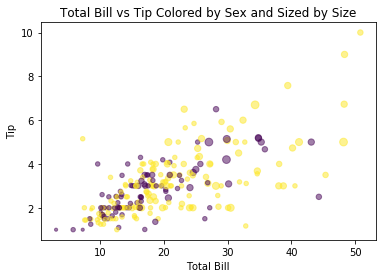

In [23]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
#scatter plot 그리기
#아래에 써주세요. 점의 크기는 한 테이블에 앉은 사람의 명수*10, 점의 색상은 성별, 투명도는 0.5로 지정해주세요. 
axes1.scatter(x=tips['total_bill'],y=tips['tip'], 
              s=tips['size']*10 ,c=tips['sex_color'], alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

## matplotlib의 그래프 설정 변경

### 1) 색상, 마커, 선 스타일

- __ax.plot(x, y, 'go--')__ : 'g--' 색상과 선 스타일을 나타내는 축약 문자열. 녹색 점선, 'o'모양 마커로 그려진 x대 y 그래프를 그린다.

- __ax.plot(x, y, linestyle='--', color='g', marker='o')__ : 더 명시적인 방법으로 선 스타일과 색상, 마커 지정

In [24]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

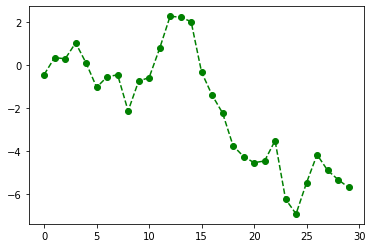

In [25]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'go--') #선 스타일: o--, 색상: 초록(g)

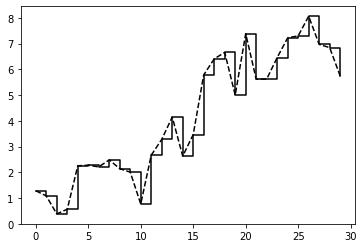

In [26]:
import numpy as np
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--') #선 스타일: -- (점선)
#plt.plot(data, 'k-')
plt.plot(data, 'k-', drawstyle='steps-post') #선 스타일: -(실선), 색상: 검정(k), 모양: 계단식  [참고] 파랑(b)

### 2) 눈금, 라벨, 범례
pyplot 인터페이스는 대화형 사용에 맞추어 설계되었으며 xlim, xticks, xticklabels 같은 메서드로 이루어져 있다. 이런 메서드로 표의 범위를 지정하거나 눈금 위치, 눈금 이름을 조절할 수 있다.

이 모든 메서드는 현재 활성화된 혹은 가장 최근에 생성된 AxesSubplot 객체에 대해 동작한다.

<IPython.core.display.Javascript object>


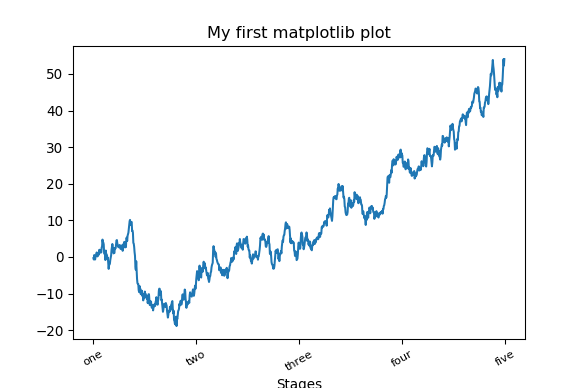

In [28]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [29]:
# x축 눈금 변경하기
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [30]:
# x축, 서브플랏 제목 변경
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 10.027243577969823, 'Stages')

<IPython.core.display.Javascript object>


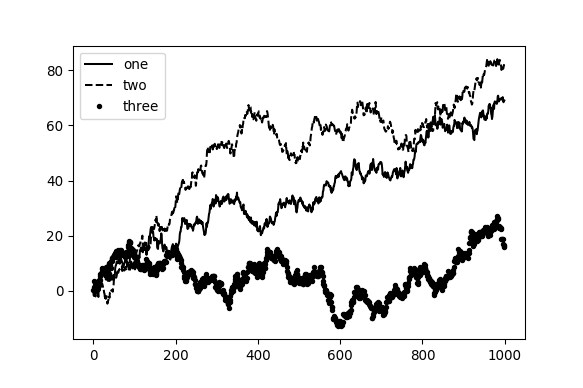

In [32]:
# 범례 추가하기

from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one') #1.각 그래프에 label 인자를 넘긴다.
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [33]:
#2.이렇게 하면 ax.legend()나 plt.legend()를 실행했을 때 자동으로 범례가 생성된다.
ax.legend(loc='best')

legend 메서드에서는 범례 위치를 지정하기 위한 loc 인자를 제공한다.

범례에서 제외하고 싶은 요소가 있다면 label 인자를 넘기지 않거나 label='_nolegend_' 옵션을 사용하면 된다.

### 3) 주석과 그림 추가하기
주석과 글자는 text, arrow, annotate 함수를 이용해 추가할 수 있다. text 함수는 그래프 내의 주어진 좌표 (x,y)에 부가적인 스타일로 글자를 그려준다.
- __ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)__

<IPython.core.display.Javascript object>


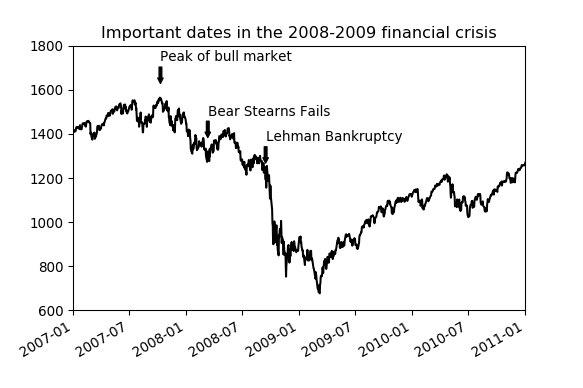

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [35]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('C:/Users/최수빈/OneDrive/바탕 화면/ESAA/0420수업자료1/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'), # 상승장 
    (datetime(2008, 3, 12), 'Bear Stearns Fails'), # 베어스턴스(투자은행) 위기 및 인수 
    (datetime(2008, 9, 15), 'Lehman Bankruptcy') # 리먼 브라더스(투자은행) 파산 
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), #x,y좌표로 지정한 위치에 라벨 추가, 화살표의 위치가 75만큼 위쪽으로 가있음
                xytext=(date, spx.asof(date) + 225), #주석 글의 위치가 225만큼 위쪽으로 가있음 
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 구간으로 확대
ax.set_xlim(['1/1/2007', '1/1/2011']) #그래프의 시작과 끝 경계 지정
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis') #그래프 제목 지정

### 그래프를 파일로 저장하기
활성화된 figure는 plt.savefig 메서드를 이용해 파일로 저장할 수 있다.

In [ ]:
plt.savefig('figpath.svg')

파일 종류는 확장자로 결정되므로 .svg 대신에 .pdf를 입력하면 PDF파일을 얻게 된다.

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

dpi는 인치당 도트해상도를 조절하고 bbox_inches는 실제 figure 둘레의 공백을 잘라낸다.

## 04-3. seaborn 라이브러리 자유자재로 사용하기
seaborn 라이브러리를 활용하면 matplotlib보다 좀 더 화려한 그래프를 그릴 수 있다. seaborn 라이브러리는 matplotlib 라이브러리를 기반으로 만든 라이브러리이다.


## 단변량 그래프 그리기 ― 히스토그램

__sns.distplot() : 일변량의 분포 그래프를 그리는 메서드__
- __히스토그램__ 과 __밀집도 그래프__ 를 같이 그린다. __양탄자 그래프__ 를 추가할 수 있다.
- __kde 인자__ 를 False로 설정하면 밀집도 그래프가 제외된다. => sns.distplot(x, kde=False)
- __hist 인자__ 를 False로 설정하면 히스토그램이 제외된다. => sns.distplot(x, hist=False)
- __rug 인자__ 를 True로 설정하면 양탄자(rug) 그래프가 생긴다. => sns.distplot(x, rug=True)

__양탄자그래프__ 단일 변수에 대한 데이터를 축에 표시하는 그래프, bin(축의 너비)를 설정해야하는 히스토그램과 달리 그냥 축에 raw data를 표현

In [36]:
import seaborn as sns

tips = sns.load_dataset("tips")

<IPython.core.display.Javascript object>


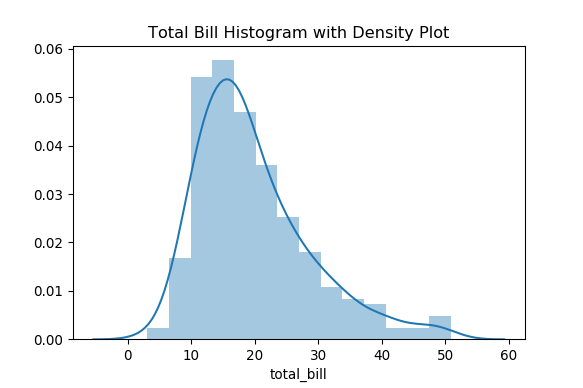

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

In [37]:
ax = plt.subplots() #1. 기본 틀 만들기 : plt.subplots()
ax = sns.distplot(tips['total_bill']) #2. 히스토그램 그리기 : sns.distplot(변수)
ax.set_title('Total Bill Histogram with Density Plot')

<IPython.core.display.Javascript object>


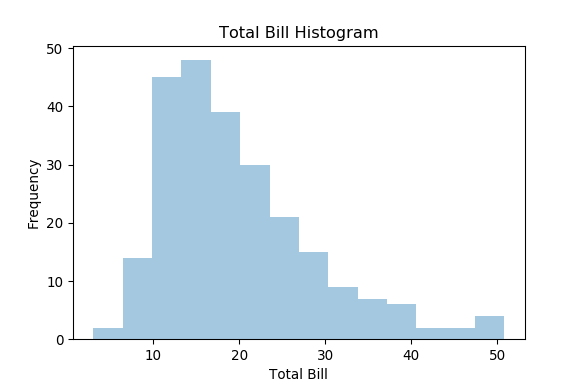

Text(0, 0.5, 'Frequency')

In [38]:
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], kde=False) # 밀집도 그래프 제외
ax.set_title('Total Bill Histogram') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


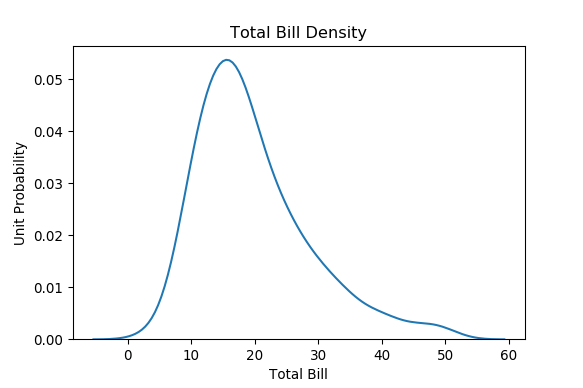

Text(0, 0.5, 'Unit Probability')

In [39]:
ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], hist=False) # 히스토그램 제외
ax.set_title('Total Bill Density') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Unit Probability')

<IPython.core.display.Javascript object>


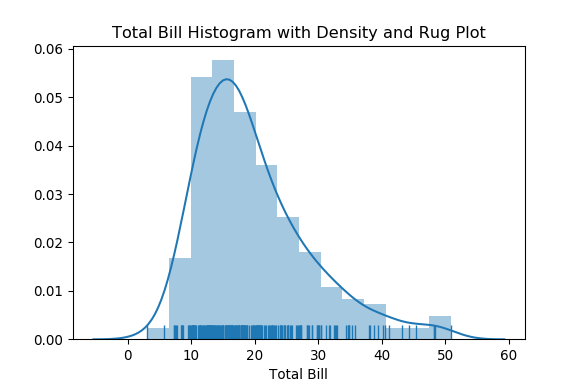

Text(0.5, 0, 'Total Bill')

In [40]:
hist_den_rug, ax = plt.subplots() 
ax = sns.distplot(tips['total_bill'], rug=True) #rug 그래프 추가
ax.set_title('Total Bill Histogram with Density and Rug Plot') 
ax.set_xlabel('Total Bill')

### 막대그래프 그리기
- 1.__sns.countplot(x) : 이산값을 가진 열 데이터를 넣어 막대 그래프를 그린다.__
- 2.__plot.bar(), plot.barh() : 각각 수직 막대그래프와 수평 막대그래프를 그린다.__

__1. sns.countplot(x) : 이산값을 가진 열 데이터를 넣어 막대 그래프를 그린다.__

<IPython.core.display.Javascript object>


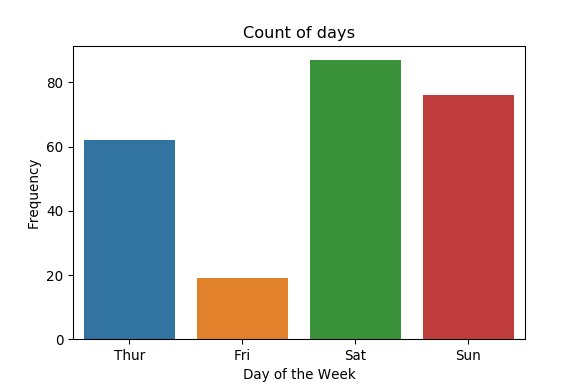

Text(0, 0.5, 'Frequency')

In [41]:
ax = plt.subplots() 
ax = sns.countplot('day', data=tips)  # 개수세서 데이터 표시
ax.set_title('Count of days') 
ax.set_xlabel('Day of the Week') 
ax.set_ylabel('Frequency') 

<IPython.core.display.Javascript object>


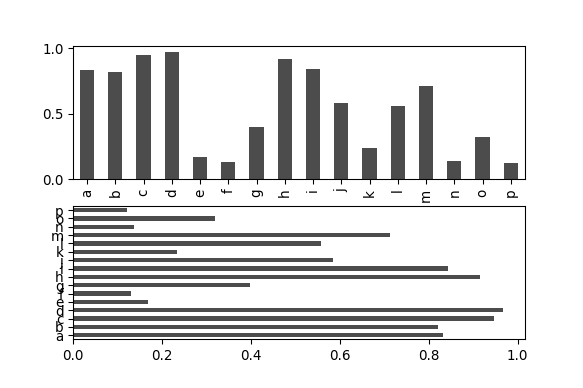

In [43]:
fig, axes = plt.subplots(2, 1) # 두개의 격자를 만든다. 
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7) #색상, 투명도 지정
data.plot.barh(ax=axes[1], color='k', alpha=0.7) # 수직으로 그려준다

DataFrame에서 막대그래프는 각 로우의 값을 함께 묶어서 하나의 구룹마다 각각의 막대를 보여준다.

In [44]:
import pandas as pd
np.random.seed(12348)
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df


Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<IPython.core.display.Javascript object>


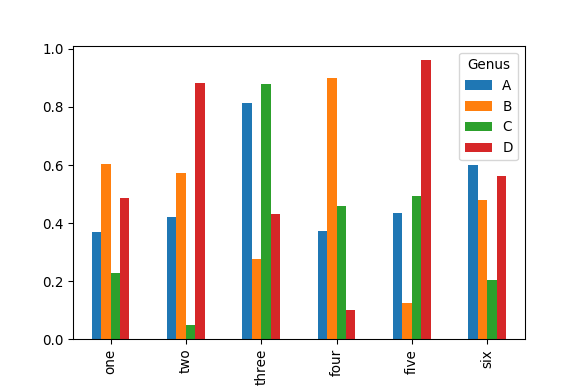

In [45]:
df.plot.bar()

DataFrame의 컬럼인 'Genus'가 범례의 제목으로 사용되었다.

#### 누적 막대 그래프 : stacked=True 옵션을 사용한다.

<IPython.core.display.Javascript object>


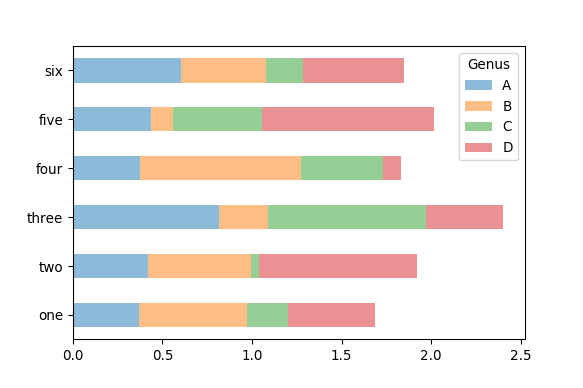

In [46]:
df.plot.barh(stacked=True, alpha=0.5) #barh는 수직으로 그려주는거


## 다양한 종류의 이변량 그래프 그리기

### 1. seaborn 라이브러리로 산점도 그래프 그리기
__sns.regplot(x,y)__
- __산점도__ 와 __회귀선__ 을 함께 그린다.
- __fit_reg 인자__ 를 False로 지정하면 회귀선을 제거한다.

<IPython.core.display.Javascript object>


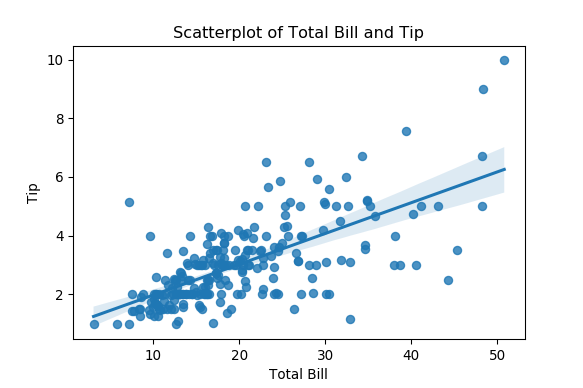

Text(0, 0.5, 'Tip')

In [47]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0, 0.5, 'Tip')

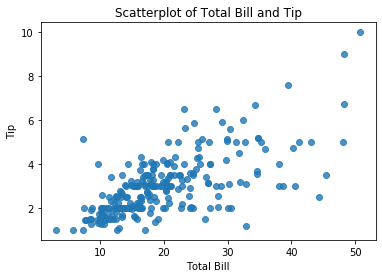

In [33]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) #회귀선 제거
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

__sns.jointplot(x,y,data)__
- __산점도__ 와 __히스토그램__ 을 한 번에 그려준다.
- __kind 인자__ 를 "hex"로 지정하면 __hexbin__ 을 그려준다. => jointplot(x,y,kind="hex")
 - __hexbin__ : 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프이다. 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현된다.

<IPython.core.display.Javascript object>


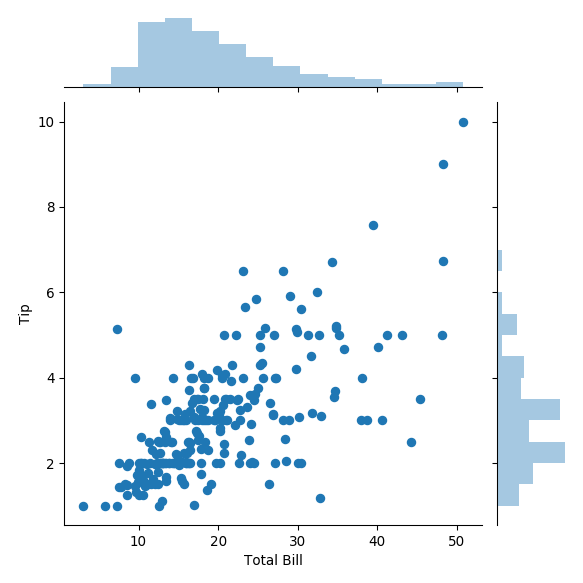

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

In [48]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip') #set_axis_labels를 이용하면 x,y축 라벨을 한꺼번에 지정할 수 있다.
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


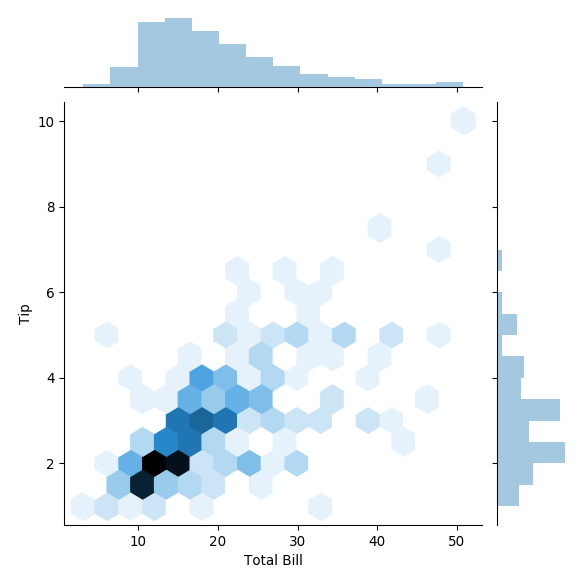

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

In [49]:
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") # 육각형으로 나오고 색이 진할수록 밀집도 높음 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 4. 이차원 밀집도(등고선도) 그리기
__sns.kdeplot(data, data2)__
 - 2개의 변수를 사용하여 이차원 밀집도를 그린다.
 - data는 x축, data2에는 y축 열이 들어간다.
 - __shade 인자__ 를 True로 지정하면 그래프에 음영효과를 줄 수 있다.

<IPython.core.display.Javascript object>


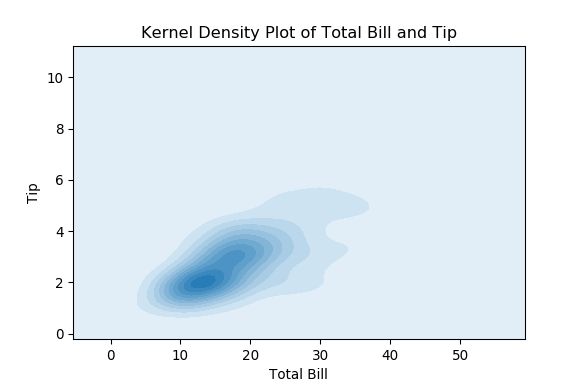

Text(0, 0.5, 'Tip')

In [50]:
ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

### 5. 바 그래프 그리기
__sns.barplot(x,y)__
 - 지정한 변수의 평균을 계산하여 바 차트를 그린다.

Text(0, 0.5, 'Average total bill')

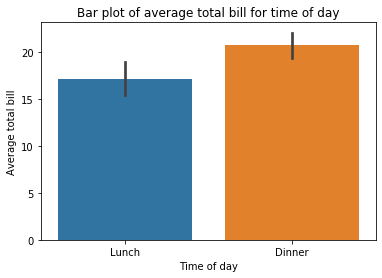

In [38]:
ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

### 6. 박스 그래프 그리기
__sns.boxplots(x,y)__
 - matplotlib과 다르게 간단히 x, y를 지정한다.

<IPython.core.display.Javascript object>


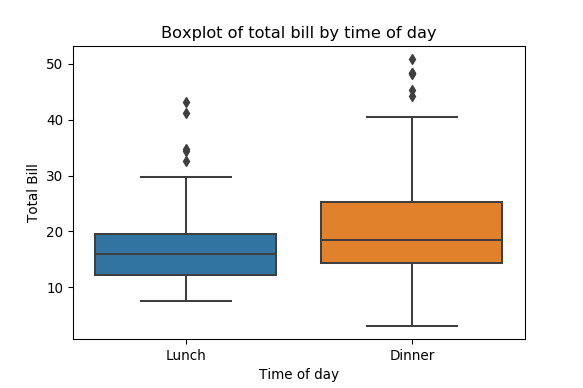

Text(0, 0.5, 'Total Bill')

In [51]:
ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

__sns.violinplot(x,y)__
- 박스 플랏보다 데이터의 분산을 더 쉽게 파악할 수 있다. boxplot과 동일한 형태로 사용한다.

<IPython.core.display.Javascript object>


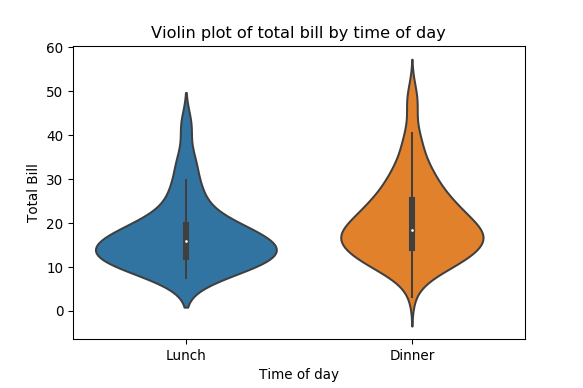

Text(0, 0.5, 'Total Bill')

In [52]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

### 8. 관계 그래프 그리기
데이터 프레임의 각 변수끼리의 관계를 나타내는 그래프들을 한꺼번에 그린다.

__sns.pairplot(데이터프레임)__

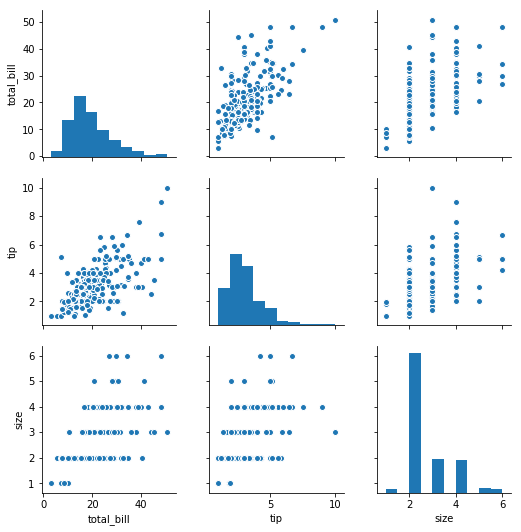

In [82]:
fig = sns.pairplot(tips)

관계 그래프의 절반(대각선을 기준으로 위)은 나머지 절반(대각선을 기준으로 아래)과 같다. 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체할 수 있다.

<IPython.core.display.Javascript object>


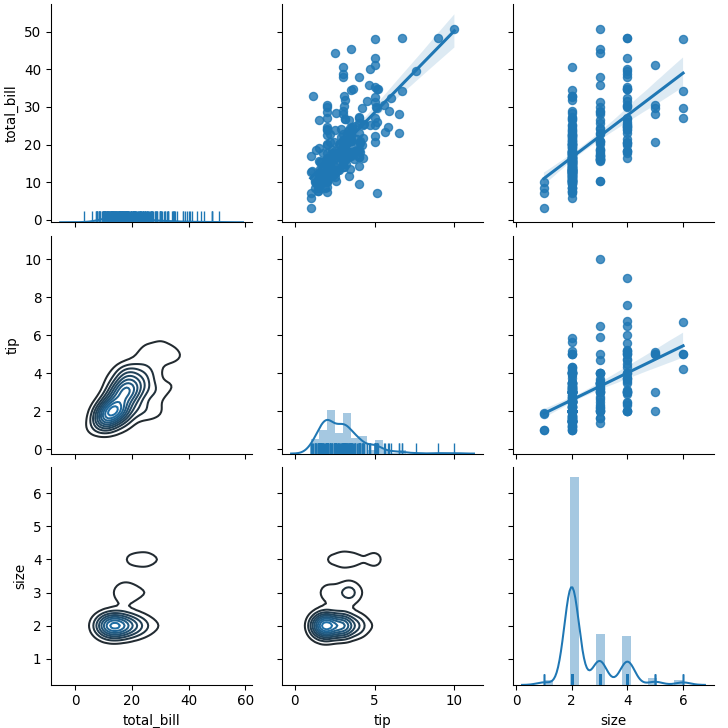

In [53]:
pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) #대각선을 기준으로 위쪽에 그릴 그래프 지정
pair_grid = pair_grid.map_lower(sns.kdeplot) #대각선을 기준으로 아래쪽에 그릴 그래프 지정
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) #대각선에 그릴 그래프 지정
plt.show()


## 다변량 그래프 그리기

### 1. seaborn 라이브러리로 바이올린 그래프 그리기 ― 색상 추가
 - __hue 인자값__ 으로 색상에 사용할 열 추가 => 여기서는 sex의 문자열을 정수로 변환하지 않아도 된다.

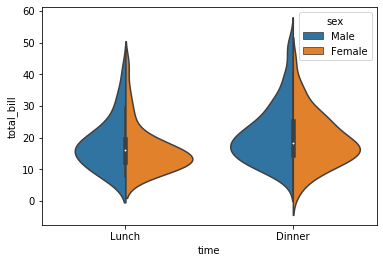

In [42]:
ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

### 2. 산점도, 관계 그래프 그리기 ― 색상 추가

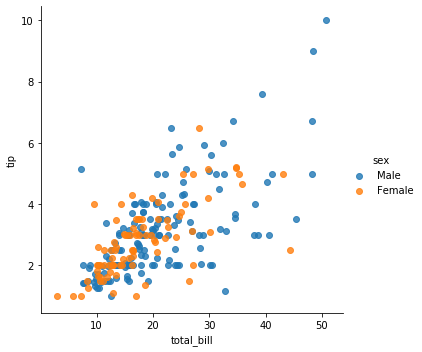

In [43]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

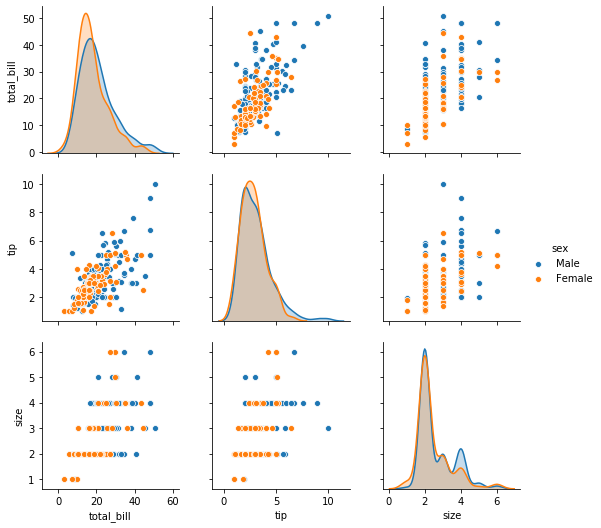

In [44]:
fig = sns.pairplot(tips, hue='sex')

### 3. 산점도 그래프의 크기와 모양 조절하기
__scatter_kws__ 에 딕셔너리 형태로 인잣값 전달

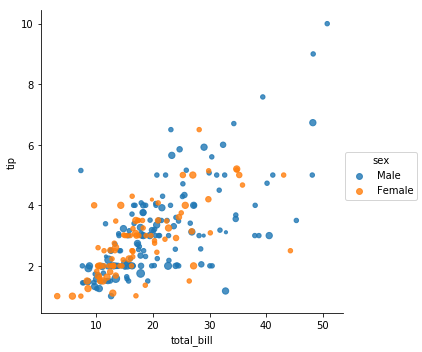

In [34]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10}) 
plt.show()

점을 다른 기호로 표현하고 싶다면 __markers 인잣값__ 에 표현하고자 하는 기호를 리스트에 담아 전달

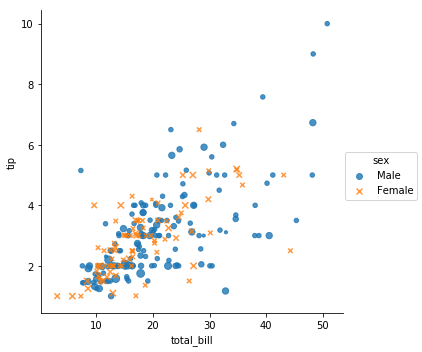

In [35]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o', 'x'], scatter_kws={'s': tips['size']*10}) 
plt.show()

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
 - __col 인자__ : 데이터 그룹을 구분할 열을 지정
 - __col_wrap 인자__ : 그래프를 그릴 열의 최댓값

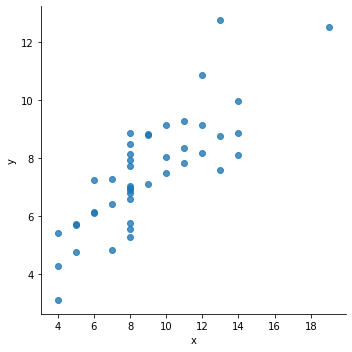

In [45]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

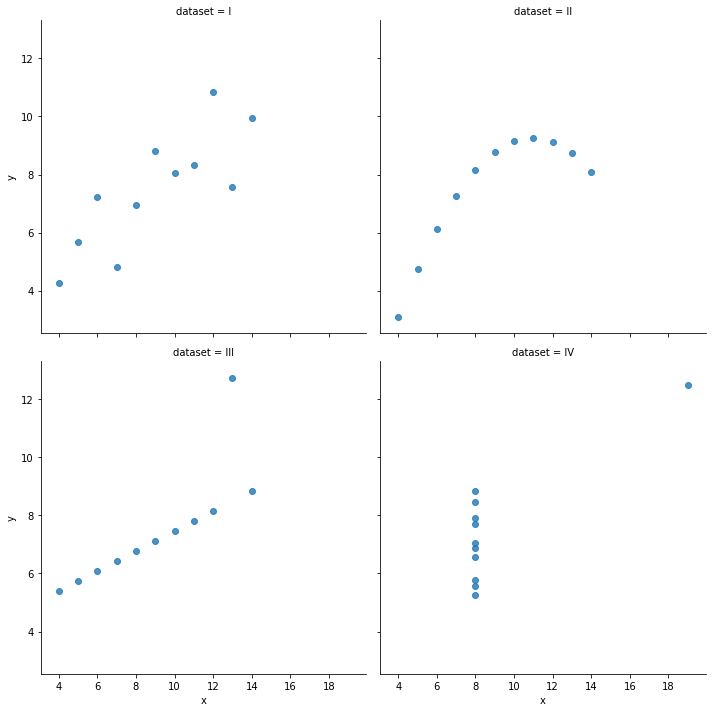

In [46]:
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)



## FacetGrid 클래스로도 그룹별 그래프를 그릴 수 있습니다

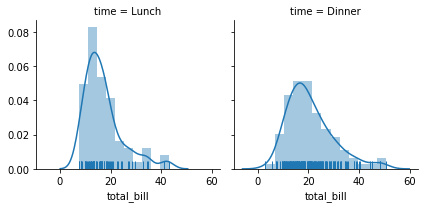

In [47]:
facet = sns.FacetGrid(tips, col='time') #데이터프레임과 그룹을 구분할 열 이름 전달하여 객체 생성
facet.map(sns.distplot, 'total_bill', rug=True) #객체(facet)의 map 메서드에 그래프의 종류와 x축으로 지정할 열 이름을 순서대로 전달

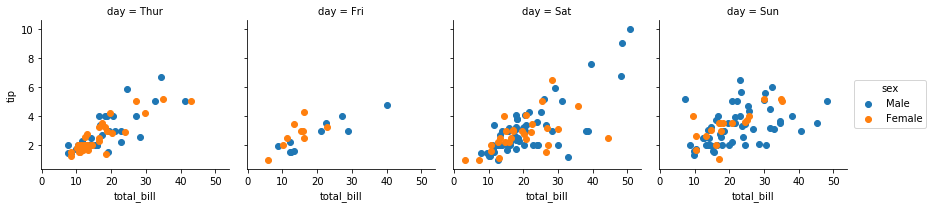

In [20]:
facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

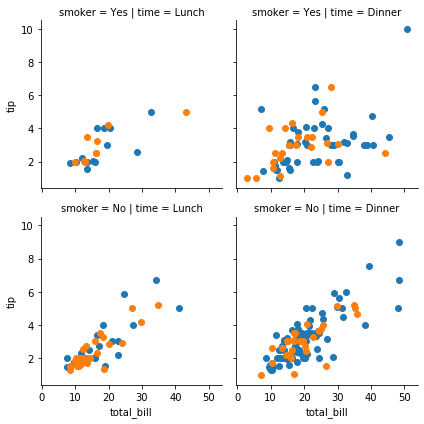

In [48]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') #col, row에 서로 다른 열을 사용하여 그래프를 그릴 수 있다.
facet.map(plt.scatter, 'total_bill', 'tip') 

## 04-4. 데이터프레임과 시리즈로 그래프 그리기
데이터프레임과 시리즈로도 그래프를 그릴 수 있다.


## 데이터프레임과 시리즈로 그래프 그리기

__히스토그램__ 시리즈의 plot 속성에 정의된 hist 메서드를 사용하면 해당 시리즈의 값을 이용하여 히스토그램을 바로 그릴 수 있다.
- 그 외에도
 - kde : 밀집도 그래프
 - scatter : 산점도
 - hexbin : 육각 그래프. gridsize 인자로 육각형 크기 변경 가능
 - box
- 위와 같은 메서드 사용 가능

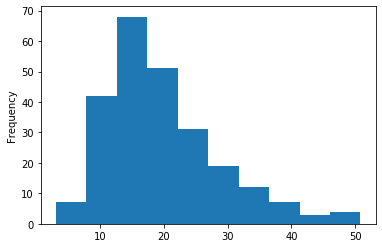

In [51]:
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist() 

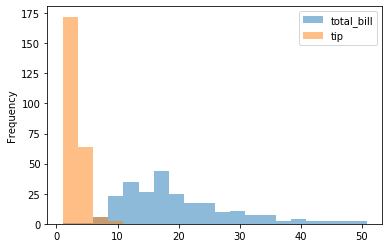

In [57]:
fig, ax = plt.subplots() 
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax) 

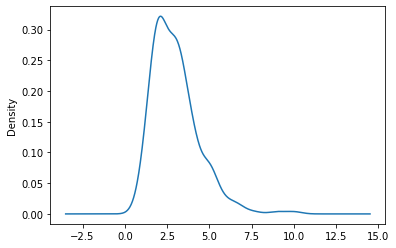

In [58]:
fig, ax = plt.subplots() 
ax = tips['tip'].plot.kde() 

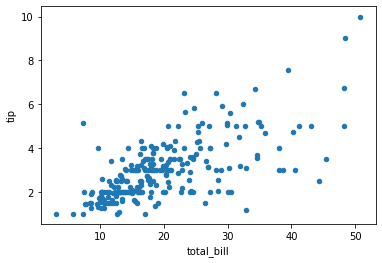

In [59]:
fig, ax = plt.subplots() 
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax) 

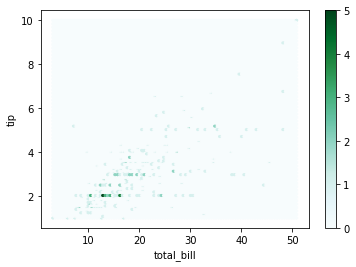

In [60]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax) 

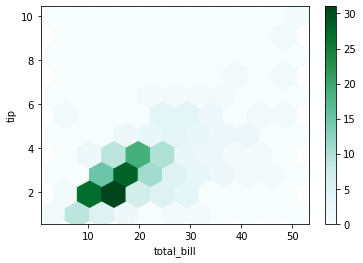

In [61]:
fig, ax = plt.subplots() 
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax) 

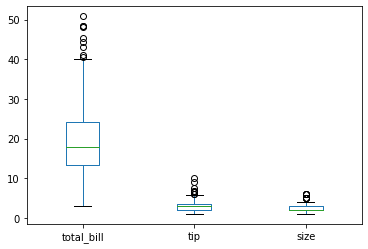

In [62]:
fig, ax = plt.subplots() 
ax = tips.plot.box(ax=ax) 

## 04-5. seaborn 라이브러리로 그래프 스타일 설정하기
__sns.set_style 메서드__
 - 한 번만 실행하면 이후에 그리는 그래프에 모두 적용된다.
 - whitegrid, darkgrid, white, dark, ticks로 5종류


## 그래프에 스타일 적용하기

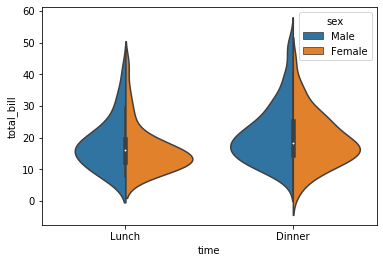

In [64]:
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

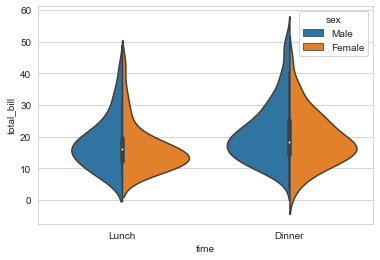

In [65]:
sns.set_style('whitegrid') #눈금있는 바탕에 그린다.
fig, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 

<IPython.core.display.Javascript object>


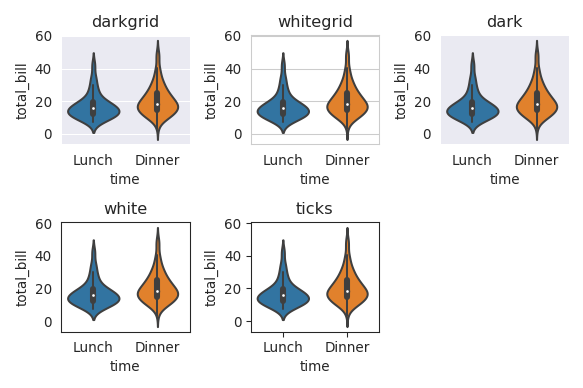

In [54]:
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
# 다양한 스타일을 원할때는 리스트 형태로 넣어준다.
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)  #여기 $$$$ 부분을 채워주세요 
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout() 

더 많은 정보를 알고 싶다면 구글에
- seaborn documentation
- matlib documentation
을 겁색하여 나오는 공식문서를 참고하세요.